In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import sklearn.discriminant_analysis as skl_da
from IPython.core.pylabtools import figsize
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.neighbors as skl_nb
import matplotlib.pyplot as plt
from numpy import argmax
from numpy import array
import pandas as pd
import numpy as np
import sklearn
import pickle





# Part 1

In [3]:
df = pd.read_pickle('C:/Users/amaca253/Desktop/Friends-Friends-Language-Analysis/BBT/data_300pca.pkl')
df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA293,PCA294,PCA295,PCA296,PCA297,PCA298,PCA299,PCA300,Person,Said
0,1.675719,-1.319399,-2.019767,0.198200,0.265078,1.079442,0.354572,-1.425332,1.996662,-0.697950,...,0.619654,0.519845,-0.420255,-0.658599,-0.804350,-0.600754,1.633092,0.438553,Sheldon,So if a photon is directed through a plane wi...
1,-0.738075,-0.489548,-2.824608,-4.669704,-4.421829,-3.628897,4.566778,-1.940420,-0.805026,1.291194,...,0.277675,0.523433,0.465433,-1.240289,-1.932272,0.771401,-0.689728,-0.222460,Leonard,"Agreed, what’s your point?"
2,0.023088,-3.615129,-3.614061,1.603215,-3.839465,-0.310876,1.639979,-0.277104,-0.785371,-2.348369,...,-0.151223,0.218587,0.660849,-0.547520,-0.638980,0.702545,0.947406,0.188374,Sheldon,"There’s no point, I just think it’s a good id..."
3,-3.843726,-0.680782,-0.022183,-2.649907,1.999803,-1.354753,0.067725,4.673972,-3.198486,-2.428593,...,0.012347,0.615724,0.279591,0.296604,0.106032,-0.006768,0.188140,0.375968,Leonard,Excuse me?
4,-1.778649,0.130701,-2.860867,4.295155,0.146990,0.457549,-0.223999,-0.851303,0.422749,-1.319643,...,-0.537956,0.310967,-0.251746,-0.506256,-0.619295,0.586172,0.528049,0.205551,Leonard,"One across is Aegean, eight down is Nabakov, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44961,0.661386,-3.280896,0.798222,3.877568,1.619524,-0.604228,-0.639955,4.085811,3.374464,1.404966,...,-0.355082,0.349447,-0.381695,-0.138928,0.045503,-0.582251,-0.136679,0.775346,Sheldon,"Uh, breakfast yes, lunch no. I did have a cou..."
44962,0.741322,-0.763505,4.248314,0.491423,-0.830373,0.415257,-0.583275,-4.870221,2.362780,-0.247928,...,-0.732451,-0.324481,0.107815,-0.407448,0.498784,-0.448254,-0.378557,0.932824,Sheldon,How thoughtful. Thank you.
44963,-1.077930,-1.825903,6.022945,-1.332844,-1.944851,5.271283,-2.939926,1.627190,-0.704162,2.167357,...,0.381732,0.087602,-0.537351,-0.430186,0.142185,0.696732,-0.209957,0.220308,Sheldon,"And I with you. Question, are you seeking a r..."
44964,0.208138,-1.819766,4.365571,-4.234981,-2.341411,2.535969,1.357020,-2.345240,-0.571510,2.730916,...,0.326550,0.664004,-0.313911,0.765657,-0.406610,0.442416,0.208375,-0.391563,Sheldon,"Well, that would raise a number of problems. ..."


In [6]:
from scipy.spatial.distance import euclidean
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans
import seaborn as sns
from textwrap import wrap

def Sort(sub_li):
    sub_li.sort(key = lambda x: x[1], reverse = False)
    return sub_li

### Cluster and average position - For the plot

In [7]:
num_clusters = 10
X = df.loc[:,'PCA1':'PCA2']

kmeans = KMeans(
    n_clusters=num_clusters, 
    init='k-means++', 
    max_iter=100, 
    n_init=50)


label = kmeans.fit_predict(X)
df['Cluster']= label
df2 = X.values

closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = df2[kmeans.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]
    cluster_cen = kmeans.cluster_centers_[iclust]
    min_idx = np.argmin([euclidean(df2[idx], cluster_cen) for idx in cluster_pts_indices])
    closest_pt_idx.append(cluster_pts_indices[min_idx])

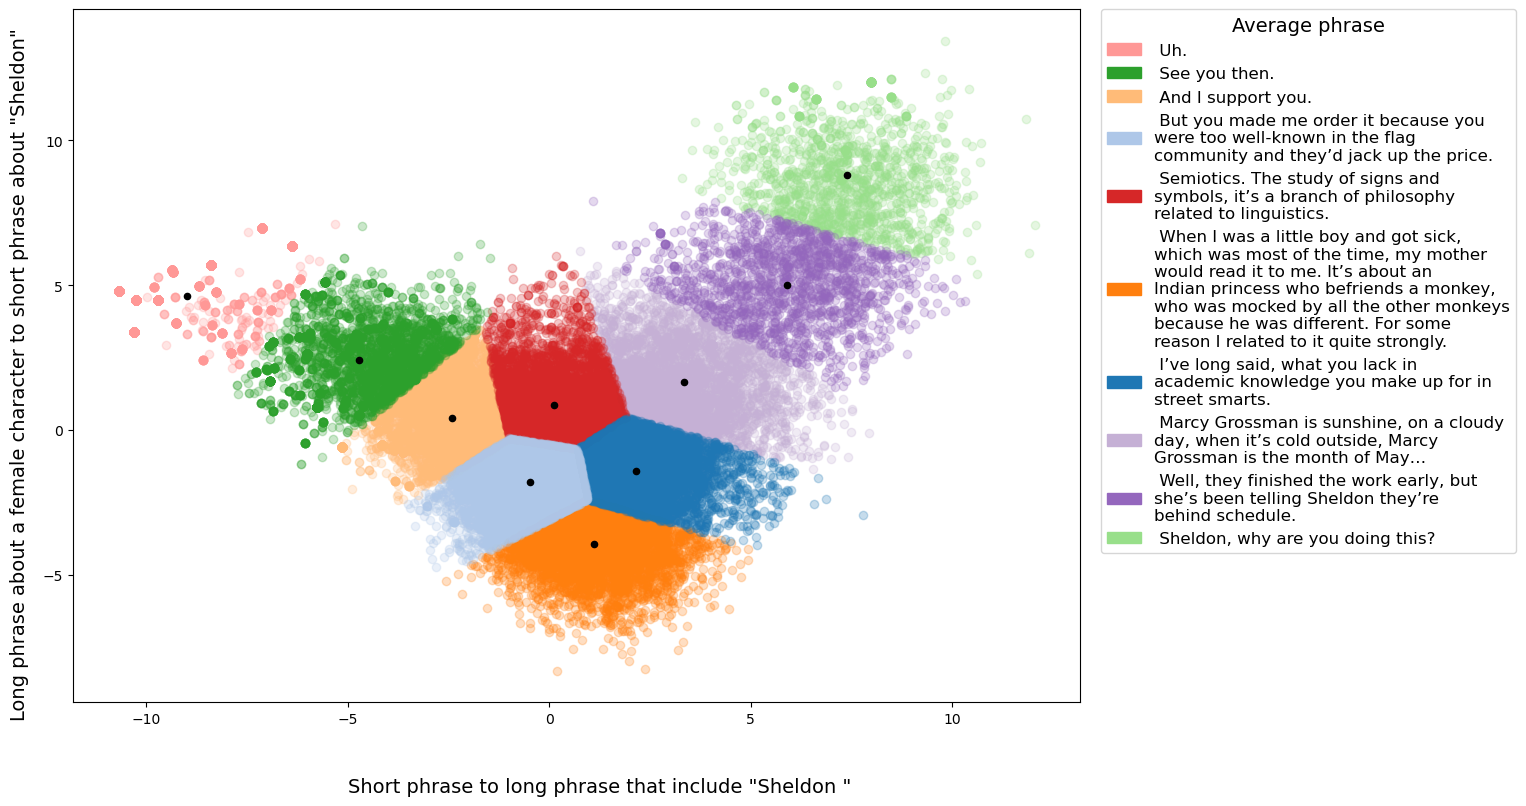

In [8]:
centroids = kmeans.cluster_centers_

centroid_list = []
for i in np.arange(len(centroids)):
    liste= [i, centroids[i,0], centroids[i,1]]
    centroid_list.append(liste)


centroid_list = Sort(centroid_list)


u_labels = np.unique(label)
text = [df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]
text2 = [ '\n'.join(wrap(l, 40)) for l in text]


colors = sns.color_palette('tab20', 10)
ind_col_map = {x:y for x, y in zip(df['Cluster'].unique(),colors)}
ind_col_map = dict(sorted(ind_col_map.items()))

key_order = [i[0] for i in centroid_list]


fig = plt.figure(figsize= (13,9))
ax = fig.add_subplot(111)


for i in u_labels:
    ax.scatter(df2[label == i , 0] , df2[label == i , 1] ,color=ind_col_map[i],  label = i, alpha= 0.25)
ax.scatter(centroids[:,0] , centroids[:,1] , s = 20, color = 'k')
#legend_list = []
#for key in ind_col_map.keys():
#    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=text2[key]))
legend_list = []
for key in key_order:
    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=text2[key]))
    


ax.legend(title='Average phrase',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left',borderaxespad=0, fontsize=12, title_fontsize=14)

x_text = 'Short phrase to long phrase that include \"Sheldon \"' #for pca1
plt.text(-5, -12.5, x_text, ha='left', wrap=True,fontsize=14)



y_text = 'Long phrase about a female character to short phrase about \"Sheldon\" ' # for pca2
plt.text(-13, -10, y_text, rotation = 90 , wrap=True,fontsize=14)

#plt.savefig('PCA1_2.png',bbox_inches='tight')
plt.show()

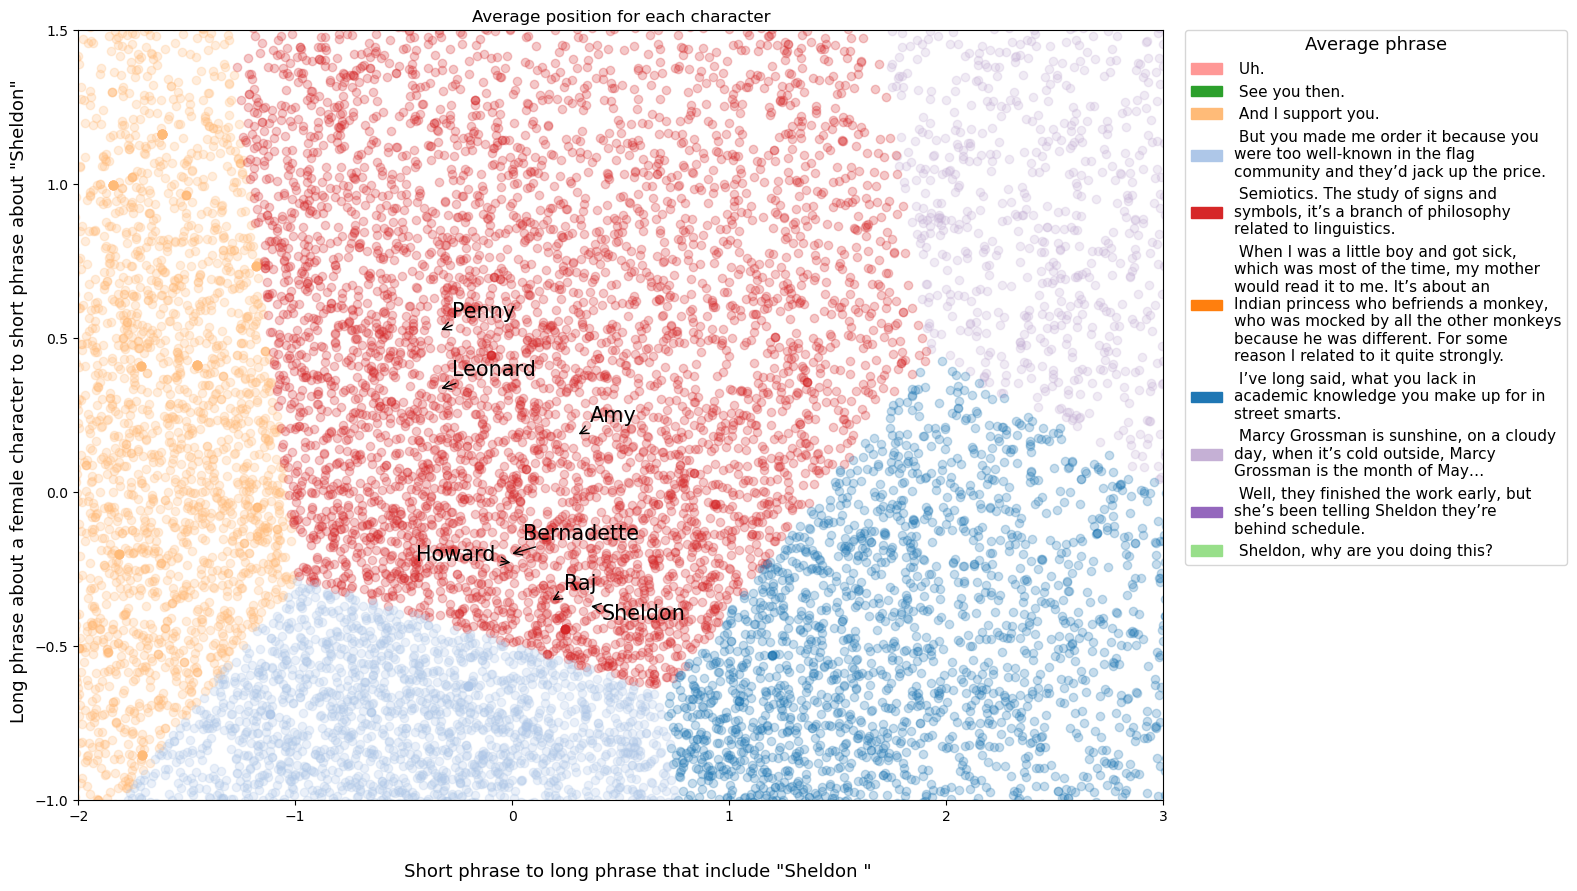

In [10]:
sheldon =df[df['Person'].str.contains('Sheldon')]
sheldon_mean_pca1_index = sheldon['PCA1'].mean()
sheldon_mean_pca2_index = sheldon['PCA2'].mean()

leonard =df[df['Person'].str.contains('Leonard')]
leonard_mean_pca1_index = leonard['PCA1'].mean()
leonard_mean_pca2_index = leonard['PCA2'].mean()

penny =df[df['Person'].str.contains('Penny')]
penny_mean_pca1_index = penny['PCA1'].mean()
penny_mean_pca2_index = penny['PCA2'].mean()

howard =df[df['Person'].str.contains('Howard')]
howard_mean_pca1_index = howard['PCA1'].mean()
howard_mean_pca2_index = howard['PCA2'].mean()

raj =df[df['Person'].str.contains('Raj')]
raj_mean_pca1_index = raj['PCA1'].mean()
raj_mean_pca2_index = raj['PCA2'].mean()

bernadette =df[df['Person'].str.contains('Bernadette')]
bernadette_mean_pca1_index = bernadette['PCA1'].mean()
bernadette_mean_pca2_index = bernadette['PCA2'].mean()

amy =df[df['Person'].str.contains('Amy')]
amy_mean_pca1_index = amy['PCA1'].mean()
amy_mean_pca2_index = amy['PCA2'].mean()

text = [df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]
text2 = [ '\n'.join(wrap(l, 40)) for l in text]

colors = sns.color_palette('tab20', 10)
ind_col_map = {x:y for x, y in zip(df['Cluster'].unique(),colors)}
ind_col_map = dict(sorted(ind_col_map.items()))

key_order = [i[0] for i in centroid_list]

df2 = X.values

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)

for i in u_labels:
    ax.scatter(df2[label == i , 0] , df2[label == i , 1] ,color=ind_col_map[i],  label = i, alpha= 0.25)






legend_list = []
for key in key_order:
    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=text2[key]))

ax.legend(title='Average phrase',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left',borderaxespad=0, fontsize=11, title_fontsize=13)


plt.annotate('Sheldon', (sheldon_mean_pca1_index,sheldon_mean_pca2_index), xytext=(10,-10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"), fontsize=15)

plt.annotate('Leonard', (leonard_mean_pca1_index, leonard_mean_pca2_index), xytext=(10,10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"),fontsize=15)

plt.annotate('Penny', (penny_mean_pca1_index, penny_mean_pca2_index), xytext=(10,10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"),fontsize=15)

plt.annotate('Howard', (howard_mean_pca1_index ,howard_mean_pca2_index ), xytext=(-70,2),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"),fontsize=15)

plt.annotate('Raj', (raj_mean_pca1_index,raj_mean_pca2_index), xytext=(10,9),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"),fontsize=15)

plt.annotate('Bernadette', (bernadette_mean_pca1_index, bernadette_mean_pca2_index), xytext=(10,11),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"),fontsize=15)

plt.annotate('Amy', (amy_mean_pca1_index, amy_mean_pca2_index),xytext=(10,10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"),fontsize=15)

plt.xlim(-2,3)
plt.ylim(-1,1.5) 

plt.title('Average position for each character')

x_text = 'Short phrase to long phrase that include \"Sheldon \"' #for pca1
plt.text(-0.5, -1.25, x_text, ha='left', wrap=True,fontsize=13)

y_text = 'Long phrase about a female character to short phrase about \"Sheldon\" ' # for pca2
plt.text(-2.25, -0.75, y_text, rotation = 90 , wrap=True,fontsize=13)

plt.savefig('average position.png',bbox_inches='tight')

plt.show()

In [ ]:
num_clusters = 10
X = df.loc[:,'PCA3':'PCA4']

kmeans = KMeans(
    n_clusters=num_clusters, 
    init='k-means++', 
    max_iter=100, 
    n_init=50)


label = kmeans.fit_predict(X)
df['Cluster']= label
df2 = X.values

closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = df2[kmeans.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]
    cluster_cen = kmeans.cluster_centers_[iclust]
    min_idx = np.argmin([euclidean(df2[idx], cluster_cen) for idx in cluster_pts_indices])
    closest_pt_idx.append(cluster_pts_indices[min_idx])

In [ ]:
centroids = kmeans.cluster_centers_

centroid_list = []
for i in np.arange(len(centroids)):
    liste= [i, centroids[i,0], centroids[i,1]]
    centroid_list.append(liste)


centroid_list = Sort(centroid_list)


u_labels = np.unique(label)
text = [df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]
text2 = [ '\n'.join(wrap(l, 40)) for l in text]


colors = sns.color_palette('tab20', 10)
ind_col_map = {x:y for x, y in zip(df['Cluster'].unique(),colors)}
ind_col_map = dict(sorted(ind_col_map.items()))

key_order = [i[0] for i in centroid_list]


fig = plt.figure(figsize= (13,9))
ax = fig.add_subplot(111)


for i in u_labels:
    ax.scatter(df2[label == i , 0] , df2[label == i , 1] ,color=ind_col_map[i],  label = i, alpha= 0.25)
ax.scatter(centroids[:,0] , centroids[:,1] , s = 20, color = 'k')

legend_list = []
for key in key_order:
    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=text2[key]))
    


ax.legend(title='Average phrase',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left',borderaxespad=0, fontsize=12, title_fontsize=14)

x_text = 'Phrase that question a premise to phrase with a first person futur action'
plt.text(-8, -11, x_text, ha='left', wrap=True,fontsize=14)

y_text = 'Phrase about relashionship to phrase related to food'
plt.text(-12.25, -8, y_text, rotation = 90 , wrap=True,fontsize=14)

#plt.savefig('PCA3_4.png',bbox_inches='tight')
plt.show()



In [ ]:
num_clusters = 10
X = df.loc[:,'PCA5':'PCA6']

kmeans = KMeans(
    n_clusters=num_clusters, 
    init='k-means++', 
    max_iter=100, 
    n_init=50)


label = kmeans.fit_predict(X)
df['Cluster']= label
df2 = X.values

closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = df2[kmeans.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]
    cluster_cen = kmeans.cluster_centers_[iclust]
    min_idx = np.argmin([euclidean(df2[idx], cluster_cen) for idx in cluster_pts_indices])
    closest_pt_idx.append(cluster_pts_indices[min_idx])

In [ ]:
centroids = kmeans.cluster_centers_

centroid_list = []
for i in np.arange(len(centroids)):
    liste= [i, centroids[i,0], centroids[i,1]]
    centroid_list.append(liste)


centroid_list = Sort(centroid_list)


u_labels = np.unique(label)
text = [df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]
text2 = [ '\n'.join(wrap(l, 40)) for l in text]


colors = sns.color_palette('tab20', 10)
ind_col_map = {x:y for x, y in zip(df['Cluster'].unique(),colors)}
ind_col_map = dict(sorted(ind_col_map.items()))

key_order = [i[0] for i in centroid_list]


fig = plt.figure(figsize= (13,9))
ax = fig.add_subplot(111)


for i in u_labels:
    ax.scatter(df2[label == i , 0] , df2[label == i , 1] ,color=ind_col_map[i],  label = i, alpha= 0.25)
ax.scatter(centroids[:,0] , centroids[:,1] , s = 20, color = 'k')
#legend_list = []
#for key in ind_col_map.keys():
#    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=text2[key]))
legend_list = []
for key in key_order:
    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=text2[key]))
    


ax.legend(title='Average phrase',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left',borderaxespad=0, fontsize=12, title_fontsize=14)
x_text = 'Discussion with often a negation to short question about a woman'
plt.text(-4, -13, x_text, ha='left', wrap=True,fontsize=14)


y_text = 'Phrase with an apology to phrase with affirmative statement '
plt.text(-10.75, -10.75, y_text, rotation = 90 , wrap=True,fontsize=14)

#plt.savefig('PCA5_6.png',bbox_inches='tight')
plt.show()

## Balance the dataset \& create a dataset with 2 characters

In [11]:
# Sheldon : 11484
# Leonard : 9638
Sheldon =  df.loc[df['Person']== 'Sheldon']
Leonard = df.loc[df['Person']== 'Leonard']
df = pd.concat([Sheldon, Leonard], ignore_index=True)
df= df.groupby('Person').apply(lambda x: x.sample(n=9638)).reset_index(drop = True)
print(df.pivot_table(index = ['Person'], aggfunc ='size'))

Person
Leonard    9638
Sheldon    9638
dtype: int64


# Logistic regression

In [12]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

data = df['Person']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print('integer_encoded: ',integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['Leonard' 'Leonard' 'Leonard' ... 'Sheldon' 'Sheldon' 'Sheldon']
integer_encoded:  [0 0 0 ... 1 1 1]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
['Leonard']


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
X = df.loc[:,'PCA1':'PCA300']
#X = df.loc[:,'PCA1':'PCA20']


y = integer_encoded
y = np.squeeze(y)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)
y_train, y_test =  np.squeeze(y_train),  np.squeeze(y_test)


stand = X.std(axis=0)
mean_col = X.mean(axis=0)
X = X.values

for pca in range(len(X[0,:])):
    for row in range(len(X[:,0])):
        X[row,pca] = (X[row,pca]-mean_col[pca])/stand[pca]

y = integer_encoded
y = np.squeeze(y)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)
y_train, y_test =  np.squeeze(y_train),  np.squeeze(y_test)

[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]


In [14]:
model = skl_lm.LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
print('Model summary:')
print(model)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print('Misclassification rate:', 100*np.sum(y_pred != y_test)/y_test.shape[0], "%")

# Confusion matrix
print("Confusion matrix:\n")
print(pd.crosstab(y_pred, y_test, rownames=['Actual'], colnames=['Predicted']), '\n')

# Accuracy
print(f"Accuracy: {np.mean(y_pred == y_test):.3f}")
print('accuracy_score', accuracy_score(y_pred, y_test))

# Model score
print('model score',model.score(X_train, y_train))



print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print(roc_auc_score(y_test, model.decision_function(X_test)))


Model summary:
LogisticRegression()
0.6683784624961095
Misclassification rate: 33.162153750389045 %
Confusion matrix:

Predicted     0     1
Actual               
0          2149  1071
1          1060  2146 

Accuracy: 0.668
accuracy_score 0.6683784624961095
model score 0.7019455252918287
0.7345179904242353
0.7345179904242353


In [15]:
def logistic_function(dataset, number_pca):
    pca = 'PCA'+str(i)
    X = df.loc[:,'PCA1':pca]
    X = scaled(X)
    y = integer_encoded
    y = np.squeeze(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)
    y_train, y_test =  np.squeeze(y_train),  np.squeeze(y_test)

    model = LogisticRegression(random_state=0).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_return = roc_auc_score(y_test, model.decision_function(X_test))
    return roc_return

def scaled(X):
    stand = X.std(axis=0)
    min_col = X.min(axis=0)
    X = X.values
    min_col = X.min(axis=1)
    for pca in range(len(X[0,:])):
        for row in range(len(X[:,0])):
            X[row,pca] = (X[row,pca]-min_col[pca])/stand[pca]
    return X

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
roc = []
for i in range(2,301,1):
    print('process until PCA',i)
    roc.append(logistic_function(df, i))
    print('done')


process until PCA 2
done
process until PCA 3
done
process until PCA 4
done
process until PCA 5
done
process until PCA 6
done
process until PCA 7
done
process until PCA 8
done
process until PCA 9
done
process until PCA 10
done
process until PCA 11
done
process until PCA 12
done
process until PCA 13
done
process until PCA 14
done
process until PCA 15
done
process until PCA 16
done
process until PCA 17
done
process until PCA 18
done
process until PCA 19
done
process until PCA 20
done
process until PCA 21
done
process until PCA 22
done
process until PCA 23
done
process until PCA 24
done
process until PCA 25
done
process until PCA 26
done
process until PCA 27
done
process until PCA 28
done
process until PCA 29
done
process until PCA 30
done
process until PCA 31
done
process until PCA 32
done
process until PCA 33
done
process until PCA 34
done
process until PCA 35
done
process until PCA 36
done
process until PCA 37
done
process until PCA 38
done
process until PCA 39
done
process until PCA 40

C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 109
done
process until PCA 110
done
process until PCA 111
done
process until PCA 112
done
process until PCA 113


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 114
done
process until PCA 115
done
process until PCA 116
done
process until PCA 117
done
process until PCA 118
done
process until PCA 119
done
process until PCA 120
done
process until PCA 121
done
process until PCA 122
done
process until PCA 123
done
process until PCA 124
done
process until PCA 125
done
process until PCA 126
done
process until PCA 127
done
process until PCA 128
done
process until PCA 129
done
process until PCA 130


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 131
done
process until PCA 132
done
process until PCA 133
done
process until PCA 134
done
process until PCA 135


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 136
done
process until PCA 137
done
process until PCA 138
done
process until PCA 139
done
process until PCA 140


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 141
done
process until PCA 142


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 143
done
process until PCA 144
done
process until PCA 145
done
process until PCA 146
done
process until PCA 147


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 148
done
process until PCA 149


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 150
done
process until PCA 151
done
process until PCA 152


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 153


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 154


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 155


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 156
done
process until PCA 157
done
process until PCA 158
done
process until PCA 159
done
process until PCA 160


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 161


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 162


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 163


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 164
done
process until PCA 165


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 166


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 167
done
process until PCA 168
done
process until PCA 169


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 170
done
process until PCA 171


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 172


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 173


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 174
done
process until PCA 175
done
process until PCA 176


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 177


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 178
done
process until PCA 179
done
process until PCA 180
done
process until PCA 181
done
process until PCA 182
done
process until PCA 183


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 184
done
process until PCA 185
done
process until PCA 186
done
process until PCA 187


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 188
done
process until PCA 189
done
process until PCA 190
done
process until PCA 191
done
process until PCA 192
done
process until PCA 193


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 194
done
process until PCA 195
done
process until PCA 196
done
process until PCA 197
done
process until PCA 198
done
process until PCA 199
done
process until PCA 200
done
process until PCA 201


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 202
done
process until PCA 203


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 204
done
process until PCA 205
done
process until PCA 206
done
process until PCA 207
done
process until PCA 208
done
process until PCA 209
done
process until PCA 210
done
process until PCA 211
done
process until PCA 212
done
process until PCA 213
done
process until PCA 214
done
process until PCA 215
done
process until PCA 216
done
process until PCA 217


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 218
done
process until PCA 219


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 220
done
process until PCA 221
done
process until PCA 222
done
process until PCA 223
done
process until PCA 224
done
process until PCA 225
done
process until PCA 226
done
process until PCA 227
done
process until PCA 228
done
process until PCA 229
done
process until PCA 230
done
process until PCA 231
done
process until PCA 232
done
process until PCA 233
done
process until PCA 234
done
process until PCA 235
done
process until PCA 236
done
process until PCA 237
done
process until PCA 238


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 239
done
process until PCA 240
done
process until PCA 241
done
process until PCA 242
done
process until PCA 243
done
process until PCA 244
done
process until PCA 245
done
process until PCA 246
done
process until PCA 247
done
process until PCA 248
done
process until PCA 249
done
process until PCA 250
done
process until PCA 251
done
process until PCA 252
done
process until PCA 253
done
process until PCA 254
done
process until PCA 255
done
process until PCA 256
done
process until PCA 257
done
process until PCA 258
done
process until PCA 259
done
process until PCA 260
done
process until PCA 261
done
process until PCA 262
done
process until PCA 263
done
process until PCA 264
done
process until PCA 265


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 266
done
process until PCA 267
done
process until PCA 268
done
process until PCA 269
done
process until PCA 270


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


done
process until PCA 271
done
process until PCA 272
done
process until PCA 273
done
process until PCA 274
done
process until PCA 275
done
process until PCA 276
done
process until PCA 277
done
process until PCA 278
done
process until PCA 279
done
process until PCA 280
done
process until PCA 281
done
process until PCA 282
done
process until PCA 283
done
process until PCA 284
done
process until PCA 285
done
process until PCA 286
done
process until PCA 287
done
process until PCA 288
done
process until PCA 289
done
process until PCA 290
done
process until PCA 291
done
process until PCA 292
done
process until PCA 293
done
process until PCA 294
done
process until PCA 295
done
process until PCA 296
done
process until PCA 297
done
process until PCA 298
done
process until PCA 299
done
process until PCA 300
done


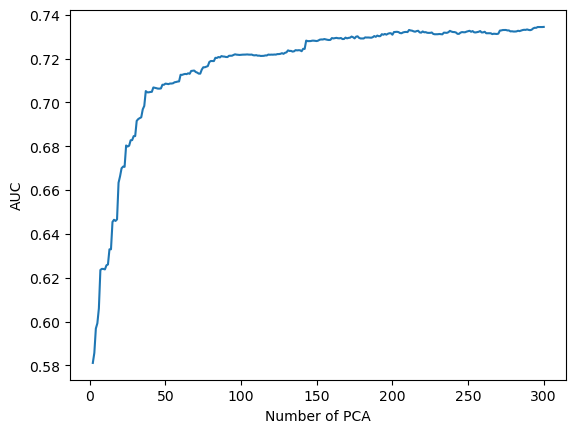

In [19]:
x = np.arange(2,301)
y =  np.asarray(roc)
plt.figure()
plt.plot(x,y)
plt.xlabel('Number of PCA')
plt.ylabel('AUC')
plt.savefig('roc_300pca.png')
plt.show()

In [20]:
coef = model.coef_

liste = []
for i in range(0,300):
    coef_temp = np.squeeze(coef[:,i])
    sub_list = [i+1, coef_temp.item(), abs(coef_temp.item())]
    liste.append(sub_list)
  

In [21]:
# Python code to sort the tuples using second element 
# of sublist Inplace way to sort using sort()
def Sort(sub_li):
    sub_li.sort(key = lambda x: x[2], reverse = True)
    return sub_li

new_list = Sort(liste)
for i in range(20):
    print('PCA',new_list[i][0])



PCA 19
PCA 2
PCA 7
PCA 15
PCA 24
PCA 37
PCA 48
PCA 3
PCA 21
PCA 4
PCA 1
PCA 13
PCA 143
PCA 43
PCA 31
PCA 79
PCA 22
PCA 35
PCA 60
PCA 26


# Part 2

### PCA Table

In [29]:
import itertools
# Creation of the binome
personnes = ['Amy','Penny','Bernadette','Sheldon', 'Leonard', 'Raj', 'Howard']
# personnes = ['Rachel', 'Ross', 'Joey', 'Monica', 'Phoebe', 'Chandler']
couples = list(itertools.combinations(personnes, 2))

for couple in couples:
    print(couple)

('Amy', 'Penny')
('Amy', 'Bernadette')
('Amy', 'Sheldon')
('Amy', 'Leonard')
('Amy', 'Raj')
('Amy', 'Howard')
('Penny', 'Bernadette')
('Penny', 'Sheldon')
('Penny', 'Leonard')
('Penny', 'Raj')
('Penny', 'Howard')
('Bernadette', 'Sheldon')
('Bernadette', 'Leonard')
('Bernadette', 'Raj')
('Bernadette', 'Howard')
('Sheldon', 'Leonard')
('Sheldon', 'Raj')
('Sheldon', 'Howard')
('Leonard', 'Raj')
('Leonard', 'Howard')
('Raj', 'Howard')


In [32]:
pca_df = pd.read_pickle('C:/Users/amaca253/Desktop/Friends-Friends-Language-Analysis/BBT/data_300pca.pkl')

In [33]:
# logistic regression

def create_dataset(dataset, perso1, perso2):
    character1 =  dataset.loc[dataset['Person']== perso1]
    character2 =  dataset.loc[dataset['Person']== perso2]
    num1 = character1.shape[0] #number of sentences of C1
    num2 = character2.shape[0] #number of sentences of C1
    minimum = min(num1,num2)
    df = pd.concat([character1, character2], ignore_index=True)
    df= df.groupby('Person').apply(lambda x: x.sample(n=minimum)).reset_index(drop = True)
    return df

# to sort a list
def Sort(sub_li):
    sub_li.sort(key = lambda x: x[2], reverse = True)
    return sub_li

coef_matrix = np.zeros((len(couples),300))

i=0
for couple in couples:
    print(str(couple[0]), str(couple[1]))
    df = create_dataset(pca_df, str(couple[0]), str(couple[1]))
    
    data = df['Person']
    values = array(data)
    print(data)
    print(values)
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    y = integer_encoded
    y = np.squeeze(y)
    
    X = df.loc[:,'PCA1':'PCA300']
    stand = X.std(axis=0)
    mean_col = X.mean(axis=0)
    X = X.values

    for pca in range(len(X[0,:])):
        for row in range(len(X[:,0])):
            X[row,pca] = (X[row,pca]-mean_col[pca])/stand[pca]
    




    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)
    y_train, y_test =  np.squeeze(y_train),  np.squeeze(y_test)

   # model = LogisticRegression(random_state=0).fit(X_train, y_train)
    model = LogisticRegression(solver='lbfgs').fit(X_train, y_train)

    coef = model.coef_
    coef_matrix[i]= coef
    i+=1

Amy Penny
0         Amy
1         Amy
2         Amy
3         Amy
4         Amy
        ...  
6833    Penny
6834    Penny
6835    Penny
6836    Penny
6837    Penny
Name: Person, Length: 6838, dtype: object
['Amy' 'Amy' 'Amy' ... 'Penny' 'Penny' 'Penny']
Amy Bernadette
0              Amy
1              Amy
2              Amy
3              Amy
4              Amy
           ...    
5267    Bernadette
5268    Bernadette
5269    Bernadette
5270    Bernadette
5271    Bernadette
Name: Person, Length: 5272, dtype: object
['Amy' 'Amy' 'Amy' ... 'Bernadette' 'Bernadette' 'Bernadette']
Amy Sheldon
0           Amy
1           Amy
2           Amy
3           Amy
4           Amy
         ...   
6833    Sheldon
6834    Sheldon
6835    Sheldon
6836    Sheldon
6837    Sheldon
Name: Person, Length: 6838, dtype: object
['Amy' 'Amy' 'Amy' ... 'Sheldon' 'Sheldon' 'Sheldon']
Amy Leonard
0           Amy
1           Amy
2           Amy
3           Amy
4           Amy
         ...   
6833    Leonard
6834    L

In [34]:
data=[]
for couple in couples:
    temp = str(couple[0])+ ' and ' +str(couple[1])
    data.append(temp)
column_names = [f'PCA{i}' for i in range(1, 301)]
df_matrix = pd.DataFrame(coef_matrix, columns=column_names)
df_matrix['Pairs'] = data
df_matrix.to_pickle('C:/Users/amaca253/Desktop/Friends-Friends-Language-Analysis/BBT/coef_matrix_TBBT_solverlbfgs.pkl')

In [35]:
df_matrix = pd.read_pickle('C:/Users/amaca253/Desktop/Friends-Friends-Language-Analysis/BBT/coef_matrix_TBBT_solverlbfgs.pkl')
df_matrix = df_matrix.sort_values('PCA1',ignore_index=True)

In [36]:
 '''Here we would like to create a dataset such that we read each row
 will take the absolute value of the values and save the 10st values in a 
 matrix, and the values of the te corresponding pca in a list'''
df_subset = df_matrix.loc[:, 'PCA1':'PCA300']
data = np.zeros((len(df_subset),10))
text=[]
for row in np.arange(len(df_matrix)):
    selected_row = np.abs(df_subset.iloc[row])
    top_10_columns = selected_row.nlargest(10)
    data[row] =df_subset.loc[row][top_10_columns.index]
    text.append(top_10_columns.index)

column_names = [f'Column{i}' for i in range(1, 11)]
df2 = pd.DataFrame(data, columns=column_names)
df2['Pairs']= df_matrix['Pairs']

# Here we want to sort the value of the 1st column
df2 = df2.sort_values('Column1',ignore_index=True)
data2 = df2.loc[:, 'Column1':'Column10']

In [37]:
# Here we want to have the text value after the sorting 
def Sort(sub_li):
    sub_li.sort(key = lambda x: x[0], reverse = True)
    return sub_li

# we create a list that will take the 
data_list = []
for i in np.arange(len(data)):
    list_10 = []
    for j in np.arange(len(data[0,:])):
        list_temp = [data[i,j], text[i][j]]
        list_10.append(list_temp)
    data_list.append(list_10)
    

sort_list = Sort(data_list)


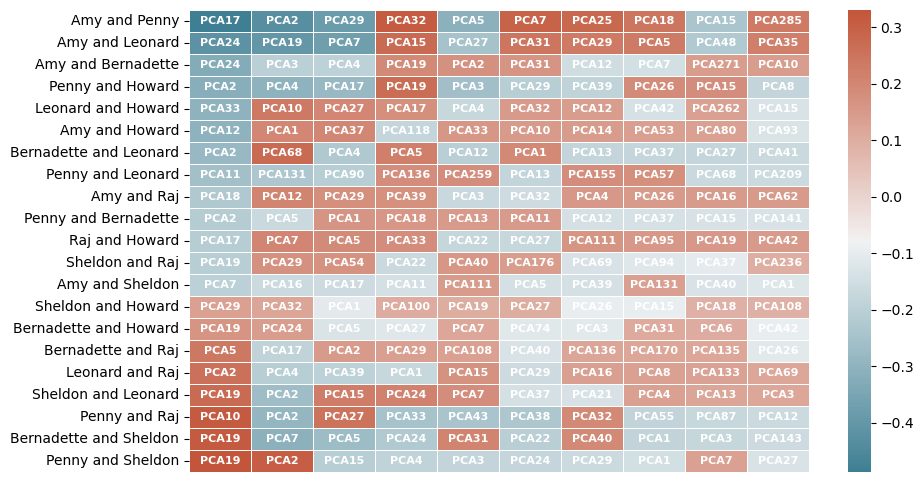

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6)) 
cmap= sns.diverging_palette(220, 20, as_cmap=True)
heatmap = sns.heatmap(data2, yticklabels=df_matrix['Pairs'], xticklabels=[], linewidths=.5, ax=ax, cmap=cmap)

# Annotate each cell with the corresponding PCA label
for i in range(len(df_subset)):
    for j in range(10):
        cell_label = sort_list[i][j][1]
        ax.text(j + 0.5, i + 0.5, cell_label, ha='center', va='center', fontsize=8, color= 'white', fontweight = 'bold')
plt.savefig('heatmap_TBBT_abs_top10.png',bbox_inches='tight')

plt.show()

In [39]:
# Here we count the number of PCA, in order to investigate the most important ones

def count_occurrences(text_list):
    # Create an empty dictionary to store counts
    counts = {}

    # Iterate through the list of text
    for item in text_list:
        # Check if the item is already in the dictionary
        if item in counts:
            # If yes, increment the count
            counts[item] += 1
        else:
            # If not, add the item to the dictionary with a count of 1
            counts[item] = 1

    # Return the dictionary with counts
    return counts

list_pca = []
for i in range(len(df_subset)):
    for j in range(10):
        list_pca.append(sort_list[i][j][1])

result = count_occurrences(list_pca)
result = dict(sorted(result.items(), key=lambda item: item[1],reverse=True))
# Print the result
for item, count in result.items():
    print(f"{item}: {count} occurrence(s)")
    
list_pca = ['PCA7','PCA19','PCA5','PCA2','PCA3','PCA15', 'PCA29','PCA1', \
            'PCA27','PCA17','PCA24','PCA10','PCA4','PCA12', 'PCA13','PCA18','PCA33','PCA37', 'PCA39']
for pca in list_pca:
    print('\subsection{',pca,'}')
    
    print('top values')
    print('\ begin{dialogue}')
    x=pca_df.nlargest(20,pca)
    for i in range(len(x)):
        print('\speak{',x.iloc[i]['Person'],'}',x.iloc[i]['Said'])
    print('\end{dialogue}')
    print()
    
    print('lowest values')
    print('\ begin{dialogue}')
    x= pca_df.nsmallest(20,pca)
    for i in range(len(x)):
        print('\speak{',x.iloc[i]['Person'],'}',x.iloc[i]['Said'])
    print('\end{dialogue}')
    print()
    print()

PCA2: 10 occurrence(s)
PCA19: 10 occurrence(s)
PCA29: 9 occurrence(s)
PCA5: 9 occurrence(s)
PCA7: 9 occurrence(s)
PCA15: 9 occurrence(s)
PCA27: 8 occurrence(s)
PCA4: 8 occurrence(s)
PCA1: 8 occurrence(s)
PCA3: 7 occurrence(s)
PCA12: 7 occurrence(s)
PCA17: 6 occurrence(s)
PCA24: 6 occurrence(s)
PCA32: 5 occurrence(s)
PCA37: 5 occurrence(s)
PCA18: 4 occurrence(s)
PCA31: 4 occurrence(s)
PCA10: 4 occurrence(s)
PCA39: 4 occurrence(s)
PCA26: 4 occurrence(s)
PCA33: 4 occurrence(s)
PCA13: 4 occurrence(s)
PCA40: 4 occurrence(s)
PCA42: 3 occurrence(s)
PCA11: 3 occurrence(s)
PCA16: 3 occurrence(s)
PCA22: 3 occurrence(s)
PCA8: 2 occurrence(s)
PCA68: 2 occurrence(s)
PCA131: 2 occurrence(s)
PCA136: 2 occurrence(s)
PCA111: 2 occurrence(s)
PCA69: 2 occurrence(s)
PCA108: 2 occurrence(s)
PCA25: 1 occurrence(s)
PCA285: 1 occurrence(s)
PCA48: 1 occurrence(s)
PCA35: 1 occurrence(s)
PCA271: 1 occurrence(s)
PCA262: 1 occurrence(s)
PCA118: 1 occurrence(s)
PCA14: 1 occurrence(s)
PCA53: 1 occurrence(s)
PCA80: 1

\speak{ Leonard }  What I’m trying to say is that, maybe you can’t approach this as a purely intellectual exercise.
\speak{ Leonard }  Yeah, sure, that might be fun.
\speak{ Amy }  Absolutely not. My colleagues and I are mapping the neurological substrates that subserve global information processing, which is required for all cognitive reasoning, including scientific inquiry, making my research ipso facto prior in the ordo cognoscendi. That means it’s better than his research, and by extension, of course, yours.
\speak{ Sheldon }  Interesting. You’re suggesting that we recreate the conditions of the mine to see if we can handle it.
\speak{ Amy }  Yes, but if I’m successful, I will be able to map and reproduce your thought processes in deriving a grand unified theory, and therefore, subsume your conclusions under my paradigm.
\speak{ Raj }  No. We can do this by ourselves.
\speak{ Amy }  Are you suggesting we live our lives guided by the philosophies found in cheap science fiction?
\spe

\speak{ Leonard }  Look, do I think that you are talented and that you are beautiful? Of course I do. But isn’t Los Angeles full of actresses who are just as talented, just as beautiful? All right, look, we’ll come back to that.
\speak{ Amy }  I do. Penny, Bernadette and I are sorry.
\speak{ Raj }  Oh, yes, we’ve got the moon and the trees and Elizabeth McNulty, who apparently died when she was the same age I am.
\speak{ Sheldon }  And on a different, but not unrelated topic, based on your current efforts to buoy my spirits, do you truly believe that you were ever fit to be a cheer leader?
\speak{ Sheldon }  Hello, female children. Allow me to inspire you with a story about a great female scientist. Polish-born, French-educated Madame Curie. Co-discoverer of radioactivity, she was a hero of science, until her hair fell out, her vomit and stool became filled with blood, and she was poisoned to death by her own discovery. With a little hard work, I see no reason why that can’t happen to 

\speak{ Leonard }  Yeah, poor us.
\speak{ Sheldon }  Well think about it, it’s a product that doesn’t spoil, and you’re going to be needing them for at least the next thirty years.
\speak{ Raj }  That is so cool. Old broken things are so much better than new things that work.
\speak{ Bernadette }  Oh, you let me worry about the money. I just want my baby to have pretty things.
\speak{ Penny }  Okay, sweetie, I’ll take care of you, what do you need?
\speak{ Leonard }  Something terrible in a former life? I don’t know.
\speak{ Leonard }  Our clothes, our wallets, phones.
\speak{ Raj }  That’s so much better than the old, ugly ones.
\speak{ Sheldon }  Really? I was thinking what we have now is a bit much.
\speak{ Raj }  Wait, what happened to us?
\speak{ Leonard }  Uh, if I still have them, they’re probably in the junk box.
\speak{ Sheldon }  I am Sheldor of Azeroth. I want my things back.
\speak{ Raj }  You know, you don’t worry about money. I’ll take care of everything.
\speak{ Penny } 

\speak{ Howard }  Unless it was singing Be Our Guest, I doubt it.
\speak{ Penny }  We can, but all right.
\speak{ Penny }  Oh, stop it, he’ll be fine.
\speak{ Leonard }  No, he’d be Bat-Man-Bat.
\speak{ Sheldon }  Point of order. I move that any vote on team names should be unanimous. No man should be forced to emblazon his chest with the bengal tiger, when common sense dictates it should be an army ant. 
\speak{ Howard }  He is. Should we name him?
\speak{ Raj }  Then we can be the Bengal Tigers.
\speak{ Howard }  Thanks. I call it the Clooney.
\speak{ Raj }  Yeah, it is. And you know we get to name it.
\speak{ Leonard }  No, if a man dresses as a bat, that’s Batman, but if Man-Man dresses as a bat, that’s Batman-Man.
\speak{ Leonard }  Come on, we should go.
\speak{ Sheldon }  No, he would be exactly the same. 
\speak{ Howard }  I guess we’d better go after him.
\speak{ Penny }  Oh, my God, we’re gonna kill them.
\speak{ Raj }  Well, he could bring the baby here.
\speak{ Penny }  Onl

\speak{ Amy }  Come on, Sheldon. Maybe we should just eat at our place.
\speak{ Leonard }  I agree. Sheldon’s sister is hiding at Penny’s because we’ve all been hitting on her at the same time. 
\speak{ Leonard }  Wait, Sheldon’s going to be there? We all promised we weren’t going to go.
\speak{ Leonard }  Come on, Sheldon, we’re going to be late.
\speak{ Penny }  But Sheldon….
\speak{ Leonard }  We all know the reason. Sheldon, what are you getting at?
\speak{ Raj }  Sheldon, they don’t have ice cream.
\speak{ Penny }  Well, I was thinking about Sheldon’s little joke the other night about me eating all your food.
\speak{ Sheldon }  No. It upsets Sheldon when she willy-nilly takes it from the containers without regard for its equitable distribution. This is essentially why you have famine in India.
\speak{ Penny }  All right, try thinking about this. Sheldon and Amy had sex.
\speak{ Amy }  Well, after that, Sheldon and I got out of the house for a while.
\speak{ Amy }  Well, I just too

\speak{ Sheldon }  I’m the child she was worried about? I have a brother and sister whose combined intellectual wattage couldn’t power a potato clock, if I spotted them the potato.
\speak{ Sheldon }  I possess the DNA of Leonard Nimoy?!
\speak{ Penny }  Your parents are old. Anything unspeakable was finished by 9:30. Go to sleep.
\speak{ Leonard }  I’m not a preschooler.
\speak{ Sheldon }  Now that Leonard’s made me aware of how high the genetic stakes are, we have to face the fact that none of you are suitable mates for my sister. 
\speak{ Sheldon }  Clearly the combination of our DNA is exceptional. Our child could be the next step in the evolution of mankind. We’ll be able to get into any preschool we want!
\speak{ Howard }  I shouldn’t be raising a kid. I don’t even eat my own vegetables.
\speak{ Penny }  Leonard, could you pick me up a few comics for my nephew’s birthday?
\speak{ Sheldon }  I used to collect them as a child. The spiral of scales open in the Fibonacci sequence. A f